# Maps in Cartopy

`LambertConformalTicks` from https://gist.github.com/ajdawson/dd536f786741e987ae4e

```bash
$ cd /path/to/data

$ wget https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/bedrock/grid_registered/netcdf/ETOPO1_Bed_g_gmt4.grd.gz

$ gunzip ETOPO1_Bed_g_gmt4.grd.gz
```

In [80]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cmocean import cm

import LambertConformalTicks as lct

%matplotlib inline

### Lambert example
Probably needed for larger maps. Requires `LambertConformalTicks` since `Cartopy` currently only supports ticklabels for Mercator and PlateCarree projections.

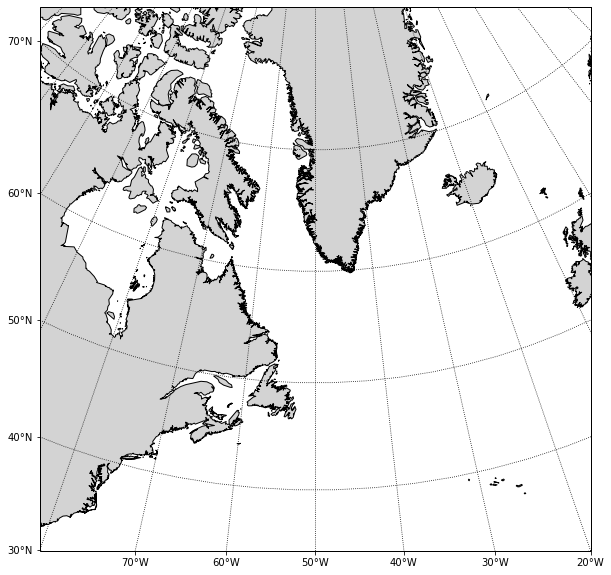

In [78]:
# Make projection and coastlines
xlim, ylim = [-80, -20], [30, 79]
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': crs.LambertConformal(np.mean(xlim), np.mean(ylim))})
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('low', edgecolor='k', facecolor='lightgray'))
fig.canvas.draw()

# Add gridlines and ticks
xticks, yticks = [list(np.arange(*l, 10)) for l in [(-120, 30), (30, 90)]]
ax.gridlines(linestyle=":", color='k', xlocs=xticks, ylocs=yticks)
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lct.lambert_xticks(ax, xticks)
lct.lambert_yticks(ax, yticks)

### Mercator example
Suitable for smaller maps. No ticklabel hack required. Full resolution GSHHS will be slower.

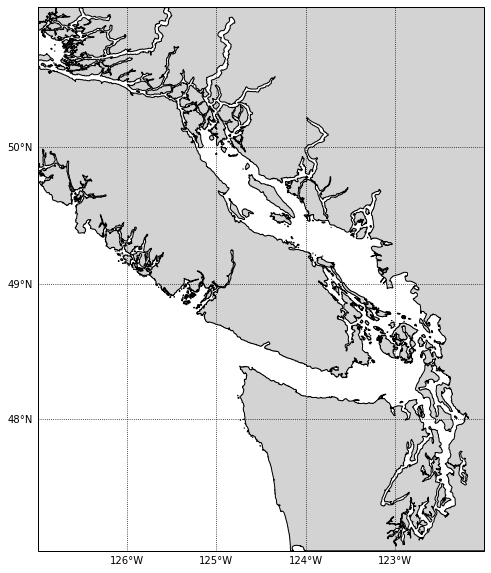

In [79]:
# Make projection and coastlines
xlim, ylim = [-127, -122], [47, 51]
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='lightgray'))

# Add gridlines and ticks
xticks, yticks = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xticks, ylocs=yticks)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

In [81]:
ds = xr.open_dataset('/ocean/bmoorema/research/MEOPAR/analysis-ben/data/bathymetry/ETOPO1_Bed_g_gmt4.grd')

In [82]:
ds

<xarray.Dataset>
Dimensions:  (x: 21601, y: 10801)
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1_Bed_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0